 # Generate figures and results of the article:
 Verena Krall$^*$, Max F. Burg$^*$, et al.: Coarsening digital route choice information prevents delay-induced congestion

In [10]:
# Automatically reload modules in IPython / Jupyter
from IPython import get_ipython

if get_ipython() is not None:
    get_ipython().run_line_magic("load_ext", "autoreload")
    get_ipython().run_line_magic("autoreload", "2")

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

import congestion_params
import draw_network
import simulation
import stability_matrix_nt
from delayinducedcongestion import plots


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 ## Figure 1a: The outflow curve

 In Figure 1a, we show the rate of outgoing cars as a function of the current number of cars on the road.

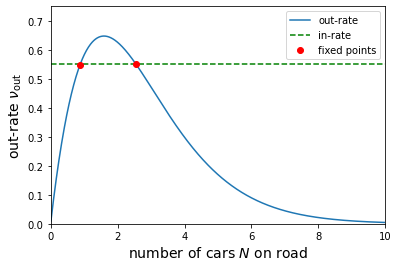

In [3]:
Ni = np.arange(0.01, 10, 0.01)
N0 = 1
outrate = (Ni ** 2) / (N0 * (np.exp(Ni / N0) - 1))
inrate = np.repeat((1.1) / 2, len(Ni))
fixed_point_idx = np.argwhere(np.diff(np.sign(outrate - inrate))).flatten()

fig, ax = plt.subplots()
ax.plot(Ni, outrate, label="out-rate")
ax.plot(Ni, inrate, "g--", label="in-rate")
ax.plot(Ni[fixed_point_idx], outrate[fixed_point_idx], "ro", label="fixed points")

ax.set_xlabel("number of cars $N$ on road", fontsize=14)
ax.set_ylabel(r"out-rate $\nu_{\mathrm{out}}$", fontsize=14)
ax.legend()
plt.xlim((0, 10))
plt.ylim((0, 0.75))
plt.show()


 ## Figure 2a: The phase diagram for a two-route network

 To determine traffic flow stability in a two-route network, we solve the delay differential equations given in our paper numerically using Mathematica. For details on how to generate the output files, please see our Mathematica notebook. Here, we only provide the code to generate the figure from the existing data files.

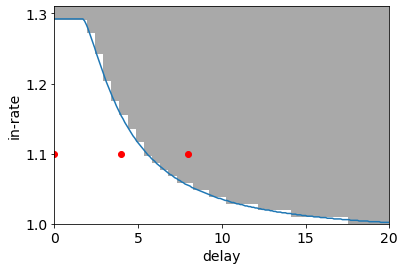

In [7]:
file = "data/MaxDiffs_N0_10_nuMin_1_0_nuMax_1_31_dNu_0_01_tauMin_0_tauMax_20_dtau_0_5_Ninit_fp_pm_0_1_tMax_500.csv"
tau_file = "data/stabBoundary_tauVals_N0_1.csv"
nu_file = "data/stabBoundary_nuVals_N0_1.csv"

plots.delaycontourplot(file, tau_file, nu_file)


 ## Figure 3a and b: Stability when providing averaged information

 Also here, the actual calculations are done with Mathematica. See below how to generate the final plots from the data.


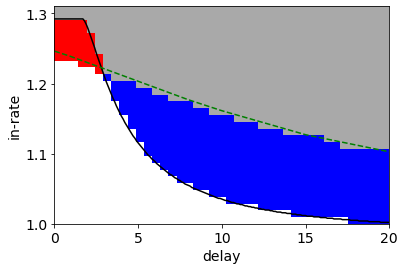

In [9]:
tau_file = "data/stabBoundary_tauVals_N0_1.csv"
nu_file = "data/stabBoundary_nuVals_N0_1.csv"

avfile = "data/AvMaxDiffs_T50_N0_1_nuMin_1_nuMax_1_31_dNu_0_01_tauMin_0_tauMax_20_dtau_0_5_Ninit_fp_pm_0_1_tMax_500.csv"
file = "data/MaxDiffs_N0_10_nuMin_1_0_nuMax_1_31_dNu_0_01_tauMin_0_tauMax_20_dtau_0_5_Ninit_fp_pm_0_1_tMax_500.csv"

av_taufile = "data/stabBoundary_av_tauVals_N0_1.csv"
av_nufile = "data/stabBoundary_av_nuVals_N0_1.csv"

plots.combinedcontourplot(file, avfile, tau_file, nu_file, av_taufile, av_nufile)



In [10]:
tau10file = "data/MaxDiff_tau_10_T_1_to_50_dT_1_nuIn_1_0_to_1_3_dnu_0_001.csv"
tau1file = "data/MaxDiff_tau_1_T_1_to_50_dT_1_nuIn_1_0_to_1_3_dnu_0_001.csv"
tau5file = "data/MaxDiff_tau_5_T_1_to_50_dT_1_nuIn_1_0_to_1_3_dnu_0_001.csv"



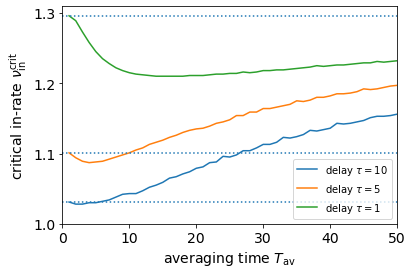

In [11]:
plots.plot_crit_inrates_time_averaging(tau1file, tau5file, tau10file)



 ## Figure 4a:
 ### Run simulations in the 5x5 grid without averaging

 To generate Fig. 4a, we simulate route choices of drivers based on delayed information in a 5x5 grid.

 The code below starts the simulations. For each pair of delay $\tau$ and in-rate $\nu_\text{in}$, we generate 100 realizations of the Poisson process and let them run for $t=400$ time steps. The results are saved in .csv file.

As the total number of simulations we need to generate the data is high, we provide you with the outcomes we have previously generated, such that you do not have to run the simulations yourself to reproduce the figure.

In [3]:
# simulation parameters
runtime = 400
inrate_vals = np.arange(70, 122, 2)
delay_vals = range(0, 21)
fraction_informed = 1
num_repetitions = 100
outcomefile = "data/congestion_params_rep100_tmax400.csv"



You can skip this part if you do not want to generate new data.

In [ ]:
congestion_params.run_sims(
    periodic=False,
    until=runtime,
    rs=inrate_vals,
    delays=delay_vals,
    fs=[fraction_informed],
    pointlist=None,
    repetitions=num_repetitions,
    pickledir=None,
    outcomefn=outcomefile,
)

 With the generated data, we can now plot the phase diagram shown as Fig. 4a in the article.

 For this, we have to first evaluate the data to see, in which simulations congestion has occurred. We also find the critical values, i.e. the in-rates corresponding to each delay for which half of the realizations were congested.

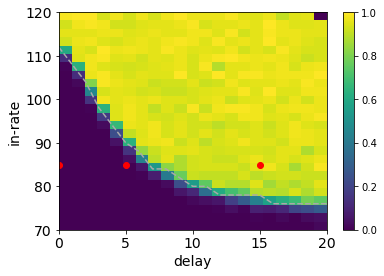

In [9]:
stability_matrix_nt.phaseplot(outcomefile,
                             rs = inrate_vals,
                             delays=delay_vals,
                             num_repetitions=num_repetitions)

 ## Figures 4b-d and e
 ### Draw street loads from exemplary simulation runs

 In Figures 4b-d we show results from exemplary simulations for three different delays. With the code below, simulations with the same set of parameters can be generated and evaluated.


In [17]:
env_tau0 = simulation.do_sim(r=85, delay=0, periodic=False)
im_0 = draw_network.draw_car_distribution(env_tau0)

env_tau5 = simulation.do_sim(r=85, delay=5, periodic=False)
im_5 = draw_network.draw_car_distribution(env_tau5)

env_tau15 = simulation.do_sim(r=85, delay=15, periodic=False)
im_15 = draw_network.draw_car_distribution(env_tau15)



congested at time 190


<ipython-input-18-19adb045c4ca>:21: UserWarning: set_ticks() must have been called.
  cb1.set_ticklabels([0, 4, 8, 12, 16], update_ticks=True)


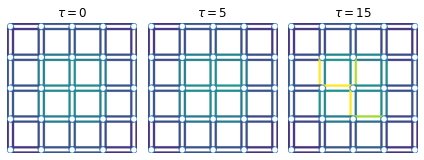

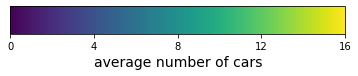

In [18]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(np.asarray(im_0))
ax[0].set_title(r"$\tau=0$")
ax[1].imshow(np.asarray(im_5))
ax[1].set_title(r"$\tau=5$")
ax[2].imshow(np.asarray(im_15))
ax[2].set_title(r"$\tau=15$")
ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")
fig.tight_layout()


fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.get_cmap("viridis")
norm = mpl.colors.Normalize(vmin=0, vmax=16)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation="horizontal")
cb1.set_ticklabels([0, 4, 8, 12, 16], update_ticks=True)
cb1.set_ticks([0, 4, 8, 12, 16], update_ticks=True)

cb1.set_label("average number of cars", fontsize=14)


 Figure 4e shows the street loads as a function of time on two alternative routes toward the center. (See the pdf-file *StreetNetwork_5x5Grid.pdf* for the indices corresponding to each street)

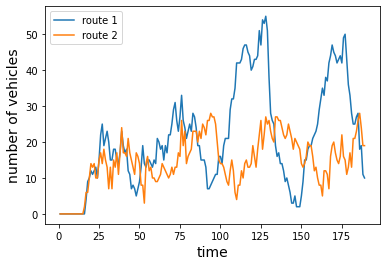

In [20]:
plt.plot(env_tau15.times, env_tau15.state[:, 43] + env_tau15.state[:, 38], label="route 1")
plt.plot(env_tau15.times, env_tau15.state[:, 42] + env_tau15.state[:, 23], label="route 2")

plt.xlabel("time", fontsize=14)
plt.ylabel("number of vehicles", fontsize=14)
plt.legend()



 ## Figure 5
 ### Simulate route choices if information is averaged and compare to findings from without averaging

 In Figure 5, we show the effect of providing drivers with averaged information. Below, we provide the code which starts simulations for given delays and in-rates, with a certain time window over which traffic information is averaged.

In [2]:
# simulation parameters
runtime = 400
inrate_vals = np.arange(70, 122, 2)
delay_vals = range(0, 21)
fraction_informed = 1
num_repetitions = 100
average_timewindow = 50
outcomefile_av = "data/congestion_params_av50_rep100_tmax400.csv"



Again, it is not necessary to redo the simulations here, as we provide you with the data. 

In [ ]:
congestion_params.run_sims_averaging(
    periodic=False,
    until=runtime,
    rs=inrate_vals,
    delays=delay_vals,
    Tav=average_timewindow,
    fs=[fraction_informed],
    pointlist=None,
    repetitions=num_repetitions,
    pickledir=None,
    outcomefn=outcomefile_av,
)


 The results from these simulations can now be compared to those found above without averaging.

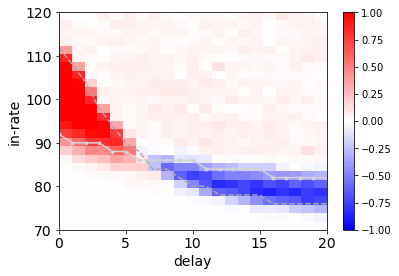

In [8]:
stability_matrix_nt.phasediffplot(outcome_file_noavg=outcomefile,
                                  outcome_file_avg=outcomefile_av,
                                  rs = inrate_vals,
                                  delays = delay_vals,
                                  num_repetitions=num_repetitions)

 ## Figure 6
 ### Run simulations when only a fraction of drivers is informed

 The results in Figure 6 are obtained by varying the fraction of informed drivers for three different delays and determining then the critical in-rate at which congestion occurs.

 To save time, we have here chosen distinct inrate-ranges for each delay, basing our choices on the findings from before.

In [3]:
# simulation parameters
runtime = 400

fraction_informed_vals = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
num_repetitions = 100

inrate_vals1 = np.arange(75, 122, 1)
delay_val1 = 1
outcomefile_delay1 = "data/congestion_params_tau1_varf.csv"

inrate_vals5 = np.arange(75, 112, 1)
delay_val5 = 5
outcomefile_delay5 = "data/congestion_params_tau5_varf.csv"

inrate_vals15 = np.arange(70, 102, 1)
delay_val15 = 15
outcomefile_delay15 = "data/congestion_params_tau15_varf.csv"

Again, to save time you may want to skip the following step and just reproduce the plot with the provided data.

In [ ]:
congestion_params.run_sims(
    periodic=False,
    until=runtime,
    rs=inrate_vals1,
    delays=[delay_val1],
    fs=fraction_informed_vals,
    pointlist=None,
    repetitions=num_repetitions,
    pickledir=None,
    outcomefn=outcomefile_delay1,
)

congestion_params.run_sims(
    periodic=False,
    until=runtime,
    rs=inrate_vals5,
    delays=[delay_val5],
    fs=fraction_informed_vals,
    pointlist=None,
    repetitions=num_repetitions,
    pickledir=None,
    outcomefn=outcomefile_delay5,
)

congestion_params.run_sims(
    periodic=False,
    until=runtime,
    rs=inrate_vals15,
    delays=[delay_val15],
    fs=fraction_informed_vals,
    pointlist=None,
    repetitions=num_repetitions,
    pickledir=None,
    outcomefn=outcomefile_delay15,
)

 Finally, we evaluate the simulation results and compare them for the three delays.

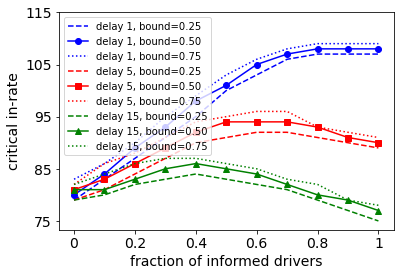

In [7]:
stability_matrix_nt.critrates_plot(parameter_dict = {delay_val1: {'outcome': outcomefile_delay1,
                                          'rs': inrate_vals1},
                                  delay_val5: {'outcome': outcomefile_delay5,
                                          'rs': inrate_vals5},
                                  delay_val15: {'outcome': outcomefile_delay15,
                                          'rs': inrate_vals15}},
                    fvals = fraction_informed_vals,
                    rep=num_repetitions,
                    boundvals = [0.25, 0.5, 0.75],
                    plotrange = np.arange(75, 115, 1))

## Appendix 

In the Appendix, we discuss how we predict the critical in-rates using linear stability analysis. 

### Figures 7 and 8
For the Figures 7 and 8 which show the real and imaginary parts of eigenvalues for the delay-differential equation, we refer to the Mathematica notebook.

### Figure 9 
In Figure 9 we discuss the impact of informing only a fraction of drivers both in homogeneous and in heterogeneous street networks. Figures 9a and b are again generated using Mathematica.

For Figure 9c, we simulate drivers in a periodic (and, thus, homogeneous) grid network. This periodic grid congests for higher in-rates, which leads to even longer simulation times. For this reason, to get the critical in-rates we choose a range of in-rates in which we simulate for each pair of delay and fraction of informed drivers. 
With the provided data, you can regenerate the plot from the article as follows:

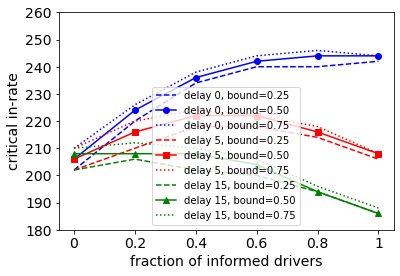

In [11]:
stability_matrix_nt.plot_critvalues_periodic()

To run a simulation with a periodic grid, you may use the following code:

In [ ]:
numrep=100
tmax=400
nu_init=200
nu_final=240
dnu=2
f=1
delay=5
outcome_fname = (
        "data/periodicgrid_congestion_params_rep%i_tmax%i_r%i_%i_dr%i_f0_%i_tau%i.csv"
        % (numrep, tmax, nu_init, nu_final, dnu, 10 * f, delay)
    )

congestion_params.run_sims(
    periodic=True,
    until=tmax,
    rs=np.arange(nu_init, nu_final, dnu),
    delays=[delay],
    fs=[f],
    pointlist=None,
    repetitions=numrep,
    pickledir=None,
    outcomefn=outcome_fname,
)